# Machine Learning
-----

In this tutorial, you will learn how to build a machine learning model in Python. The focus of the turorial is as follows: how to transform raw data into something that can be fed into a model; how to build, evaluate, compare, and select models; and how to reasonably and accurately interpret model results. We will use the `scikit-learn` package in Python to accomplish all machine learning tasks. We will use simple datasets for practice.

## Table of Contents
- [Introduction](#Introduction)
    - [Glossary of Terms](#Glossary-of-Terms)
- [Python Setup](#Python-Setup)
- [The Machine Learning Process](#The-Machine-Learning-Process)
- [Problem Formulation](#Problem-Formulation)
    - [Four Main Types of ML Tasks for Policy Problems](#Four-Main-Types-of-ML-Tasks-for-Policy-Problems)
    - [Our Machine Leaning Problem](#Our-Machine-Learning-Problem)
- [Data Exploration and Preparation](#Data-Exploration-and-Preparation)
- [Building a Model and Model Fitting](#Building-a-Model-and-Model-Fitting)
    - [Training and Test Sets](#Training-and-Test-Sets)
    - [Class Balancing](#Class-Balancing)
    - [Crosstabs](#Crosstabs)
    - [Splitting into Features and Labels](#Splitting-into-Features-and-Labels)
- [Model Understanding and Evaluation](#Model-Understanding-and-Evaluation)
    - [Running a Machine Learning Model](#Running-a-Machine-Learning-Model)
    - [Model Understanding](#Model-Understanding)
    - [Model Evaluation](#Model-Evaluation)
    - [Confusion Matrix](#Confusion-Matrix)
    - [Precision and Recall at k%](#Precision-and-Recall-at-k%)
- [Machine Learning Pipeline](#Machine-Learning-Pipeline)
- [Survey of Algorithms](#Survey-of-Algorithms)
- [Assessing Model Against Baselines](#Assessing-Model-Against-Baselines)
- [Exercise](#Exercise)
- [Additional Resources](#Additional-Resources)

### Glossary of Terms

- Back to [Table of Contents](#Table-of-Contents)

There are a number of terms specific to Machine Learning that you will find being mentioned repeatedly in this notebook. Please refer to this Glossary to remind yourself of their meanings.

- **Learning**: In Machine Learning, you'll hear about "learning a model." This is what you probably know as 
*fitting* or *estimating* a function in Statistics, Mathematics or Econometrics. Other terms include *training* or *building* a model. These terms are all synonyms and are 
used interchangeably in the machine learning literature.
- **Training Examples**: These are what you probably know as *data points* or *observations* or *rows*. They are called training examples because we know their labels.
- **Features**: These are what you probably know as *independent variables*, *attributes*, *predictors*, 
or *explanatory variables.*
- **Instances**: There are basically our *observations* or in some disciplines *cases*. In a typical ML setup, one row equals one instance.
- **Underfitting**: This happens when a model is too simple and does not capture the structure of the data well 
enough.
- **Overfitting**: This happens when a model is too complex or too sensitive to the noise in the data; this can
result in poor generalization performance, or applicability of the model to new data. 
- **Regularization**: This is a general method to avoid overfitting by applying additional constraints to the model. 
For example, you can limit the number of features present in the final model, or the weight coefficients applied
to the (standardized) features are small.
- **Supervised learning** A type of learning in which we have training exampleas with labels for each example. **The labels refer to one target or outcome variable (continuous or discrete) that we want
to predict, or classify data into**. Classification, prediction, and regression fall into this category. We call the
set of explanatory variables $X$ **features**, and the outcome variable of interest $Y$ the **label**.
- **Unsupervised learning** involves problems that do not have a specific outcome variable of interest, but rather
we are looking to understand "natural" patterns or groupings in the data - looking to uncover some structure that 
we do not know about a priori. Clustering is the most common example of unsupervised learning, another example is 
principal components analysis (PCA).


## Python Setup
- Back to [Table of Contents](#Table-of-Contents)

Before we begin, run the code cell below to initialize the libraries we'll be using in this tutorial. We're already familiar with `numpy` and `pandas` from previous tutorials. Here we'll also be using [`scikit-learn`](http://scikit-learn.org) to build machine learnign models. 

In [2]:
%pylab inline
# from __future__ import division
import os

import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
sns.set_style("white")
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth":1.25, "lines.markersize":8})

Populating the interactive namespace from numpy and matplotlib


## The Machine Learning Process
- Back to [Table of Contents](#Table-of-Contents)

The general process to process to use Machine Learning to solve problems can ge describe as follows:

- [**Problem description.**](#problem-formulation) 
The goal here is to understand the problem you are trying to solve. During this stage, you can also determine if this problem is amenable to be solved using Machine Learning. For instance, the goal could be to improve health outcomes or understand the effect of a 
variable *X* on an outcome *Y*, etc. At this stage, it is important to work with people who understand the domain being
studied to dig deeper and define the problem more concretely. What is the analytical formulation of the metric 
that you are trying to optimize?
- [**Formulate it as a machine learning problem.**](#problem-formulation) Is it a classification problem or a regression problem? Is the 
goal to build a model that generates a ranked list prioritized by risk, or is it to detect anomalies as new data 
come in? Knowing what kinds of tasks machine learning can solve will allow you to map the problem you are working on
to one or more machine learning settings and give you access to a suite of methods.
- [**Data preparation.**](#Data Preparation) Next, you need to carefully explore the data you have. Do you even have enough enough data or relevant data? In some cases, you may need to collect additional data. Is your data labelled or not-do you have training data? For instance, you may be interested in detecting fradaulent transactions in health insurance claims, but the machine learning method you will use and the type of output you get from the model  will depend on whether you have labelled data or not. Its also crucial to explore the data to understand structure of the data such as distribution of key variables, whether you have missing values in the data etc.
- [**Feature engineering.**](#feature-generation) In machine learning language, features refer to what is called variables in Statistics or Econometrics or predictors when you use model fitting language.
Creating good features is probably the most important step in the 
machine learning process. They are no hard and fast rules for this process but it may involve any of the following steps: manually picking which variables to use based on domain knowledge, transforming some variables, creating new variables baased on interactions of two or more variables or aggregating variables 
over time and space.
- **Model selection.** A model here refers to a method or technique or algorithm which you choose to use. Since they are so many off-the-shelf algorithms available, careful model selection is an important step in the process. Typically, in machine learning, you take a set of models and try all of them, empirically validate which one is giving you the best perfomance based on your metrics.
- [**Evaluation.**](#evaluation) As you build a large number of possible models, you need a way select the best one among them. In the model evaluation stage, you determine which is the best based on the data you have. 
- [**Deployment.**](#deployment) Once you have selected the best model and validated it using historical data you are ready to put the model into production. In some case, this step may  ot be necessary. FOr instance, if the project is a one off project, then you may only need to run the model a few number of times and write a report or analysis about it. However, in most cases, the model is put into production which means its running continuosly on historical and new data. Think of Amazon predicting whether you will buy a product or not.


If you have studied Statistics or Economics, you will notice that the process of model building in both disciplines exploit statistical properties in the data. Thus, model fitting in Statistics or economics or other social sciences is  is similar to machine learning. However, one key difference is that in Statistics or Economics, the focus is often *intepretation*. Thus, you usually start with a hypothesis about the underlying process that gave rise to your data, chose an appropriate model based on prior knowledge and fit it using least squares, and used the resulting parameter or coefficient estimates (or confidence intervals) for inference. This type of modeling is very useful for *interpretation*. In machine learning, the primary concern is *prediction*. rather than interpretation. In this regard, we make a few notes about the machine learning process:

- **The goal is to find a model which generalises well to the data we haven't seen** This means that we won't evaluate our model's performance using the same data (training data) that we used to fit the model on but rather a hold out dataset which the model didnt see during the fitting or training process.
- **We care less about the structure of the model and more about the performance** This means that we'll try out a whole bunch of models at a time and choose the one that works best, rather than determining which model to use ahead of time. However, you can still select a *suboptimal* model if you care about a specific model type or  model interpretability
- **We can include a lot of variables in the model.** This may sound like the complete opposite of what you've heard in the past, and it can be hard to swallow. But we will use different methods to deal with many of those concerns in the model fitting process by using a more automatic variable selection process.

## About the Iris Dataset
The data we will use in our tutorial is the Iris dataset, its one of the classical dataset in machine learning and statistics. In the dataset, each instance is a species of the flower Iris with corresponding atributes.

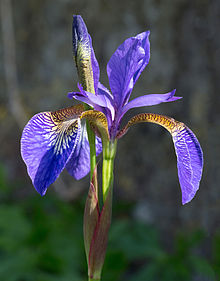

In [18]:
from IPython.display import Image
Image("../../day4-intro-machine-learning/other-resources/iris.jpg")

## Problem Formulation
- Back to [Table of Contents](#Table-of-Contents)

This is an important first step which involves turning your goal or objective into a form which can be understood in machine learning terms. For instance, the overall project goal may be to *reduce girls drop out rate* in elementary school. You may have data about characteristics of female students. In terms of machine learning, the problem can be formulated in terms of *predicting female students who will drop out*.

### Two of the Main ML TasksFour Main Types of ML Tasks for Policy Problems

- **Classification**:Classification tasks is simply related with predicting a category of a data (discrete variables). One of the most common example is predicting whether or not an email if spam or ham. Some of the common use cases could be found in the area of healthcare such as whether a person is suffering from a particular disease or not
- **Regression**: Regression tasks mainly deal with estimation of numerical values (continuous variables). Some of the examples include estimation of housing price, product price, stock price etc.

### Our Machine Learning Problem for Tutorial
For this tutorial, for the sake of learning, we are looking at a dataset of flowers of type Iris. In the dataset, each flower has four numeric attributes and a class which describes the species of flower. They are three species. Our task is to *classify* each instance of a flower into a class using the attributes.


## Data Preparation

- Back to [Table of Contents](#Table-of-Contents)

In our case, we are using a toy dataset to illustrate the process of building models and mostof the steps mentioned below may not apply. However, we still mention them to emphasize their importance. In general, data prepration will involve the following steps:

1. **Generating training data**: Since our problem is a supervised learning one, we need data with labels. Labels are the dependent variables, or *Y* variables, that we are trying to predict. In case where you dont have labels, you may need to do extra work to generate labels and this is almost always a manual process. The labels can be either *binary* or *multiclass*. 
> In our dataset, the outcome variable is not *binary* since we have 3 classes. 

1. **Decide on feature**: Features are our independent variables or predictors. Good features make machine learning systems effective. The better the features the easier it is the capture the structure of the data. One way to generate features is using domain knowledge. However, modern algorithms are trying more and more to automatically generate features. 
> For the problem we are solving in this tutorial, there isn't any feature selection because we arleady have very few features but in paractice you will find that you will spend alot of time trying to decide what features to use in your model.

1. **Feature engineering** is the process of transforming raw data into features that better represent the underlying problem/data/structure  to the predictive models, resulting in improved model accuracy." ( from [Discover Feature Engineering](http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/) ).  In text, for example, this might involve deriving traits of the text like word counts, verb counts, or topics to feed into a model rather than simply giving it the raw text. Example of feature engineering are: 
    - **Transformations**, such as converting a variable into  log, square, and square root.
    - **Dummy (binary) variables**, also known as *indicator variables*, often done by taking categorical variables (such as city) which do not have a numerical value, and adding them to models as a binary value.
    - **Discretization**. Several methods require features to be discrete instead of continuous.
    - **Aggregation.** Aggregate features often constitute the majority of features for a given problem. These use different aggregation functions (*count, min, max, average, standard deviation, etc.*) which summarize several values into one feature, aggregating over varying windows of time and space. For example, given urban data, we would want to calculate the *number* (and *min, max, mean, variance*, etc.) of crimes within an *m*-mile radius of an address in the past *t* months for varying values of *m* and *t*, and then use all of them as features.

1. **Cleaning data**: This can involve several steps whose purpose is to make sure that the data makes sense. Some things which can be done include the following: 
    - **Missing values.** Missing values can be imputed or in some cases the instances with missing values can be dropped from the model building process. Its important to check that treating missing values doesnt alter the underlying distribution in the data.
    - **Outliers.** Some wildly outling values can distort the distribution of the data and also affect perfomance of models or even predictability of the target variable. Therefore, outliers need to be handled by either excluding them from the model building process or replacing them with sensible values.

1. **Scaling features**: Machine learning models use optimisation algorithms under the hood to find the best parameters. For some optimisation techniques variables with values which vary wildly do affect the convergenc process. In this regard, it may be necessary to *scale* some features. One way of scaling features with a continuous scale is to normalise them.

## Data Exploration

- Back to [Table of Contents](#Table-of-Contents)

*In practice you can combine the previous step with this one*.
Before building a machine learning model it is necessary to inspect the data. While you may have arleady 
inspected the data during the preparation stage its often good to do further exploration before you start building building the model. They are many reasons why this is crucially important:
 - to see if the task is really solvable with machine learning
 - to check if you missed any abnormalities and oddities in the data 
 
One of the best ways to inspect data is to visualize it. Lets explore the dataset we will use in the tutorial.


### Check basic characteristics of the data
As explained earlier, its crucial to understand the data before you start building ML models. We can check the following things about the data:
- How many instances
- How many attributes/features/variables
- How many classes for the target variable
- Distribution of instances across the classes

In [19]:
# First we load the data using pandas
iris_file = os.path.abspath('../../day4-intro-machine-learning/data/iris.csv')
df = pd.read_csv(iris_file)

In [20]:
# Lets view the data
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# How many instances?
print('==========================')
print(' Number of Instances')
print('==========================')
print('They are {} instances in the dataset '.format(df.shape[0]))

 Number of Instances
They are 150 instances in the dataset 


In [22]:
# How attributes
print() # to create space
print('==========================')
print(' Number of Attributes')
print('==========================')
columns = df.columns
# remove class_label to remain with attributes
features = list(set(columns)-set(['species']))
print('Attributes: {}'.format(features))


 Number of Attributes
Attributes: ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']


In [23]:
# distribution across classes
print() # to create space
print('=========================================')
print(' Instances Distribution Across Classes')
print('=========================================')
display(df['species'].value_counts())


 Instances Distribution Across Classes


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

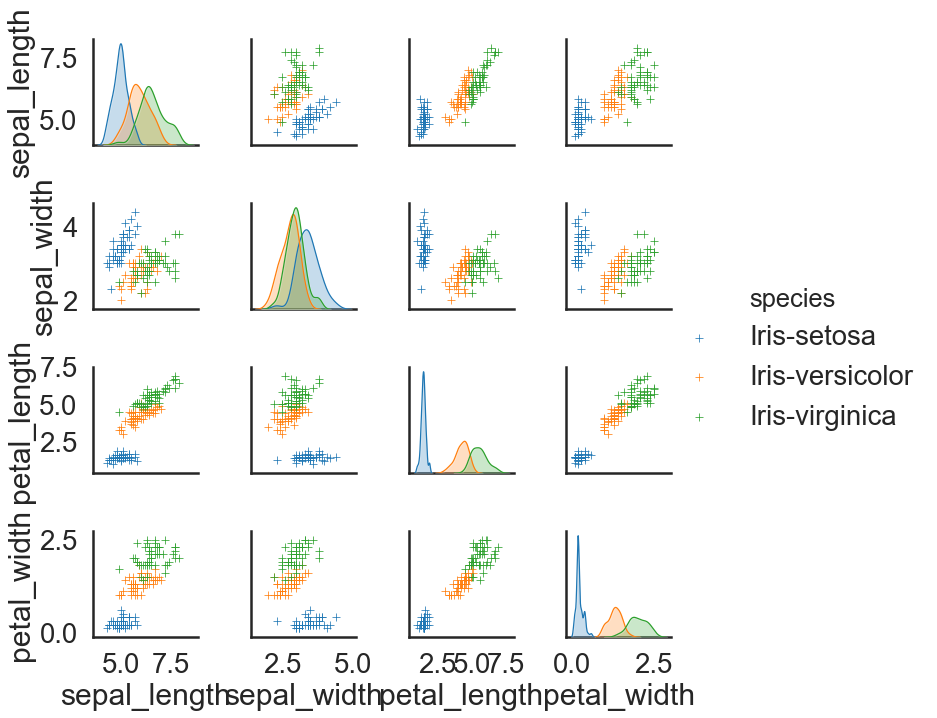

In [24]:
# create a scatter matrix from the dataframe, color by y_train
g = sns.pairplot(df, hue='species', markers='+')
plt.show()

In [ ]:
g = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

## Model Evaluation
- Back to [Table of Contents](#Table-of-Contents)

As we mentioned earlier on, its not enough to just build the model; we're going to need a way to know whether or not it generalizes to new data. In other words, we need metrics to determine whether our model is perfoming to satisfication. This is crucial not only for us as people developing the model but also for others to trust results and decisions from the model. This is where **model evaluation** comes in. 

To convince ourselves - and others - that our modeling results will generalize, we need to hold some data back (not using it to train/fit the model), then apply our model to that hold-out dataset and "blindly" predict, comparing the model's predictions to what we actually observed. This is called **cross-validation**, and it's the best way we have to estimate how a model will perform on *entirely* novel data. We call the data used to build the model the **training set**, and the rest the **test set**.

In general, we'd like our training set to be as large as possible, to allow our model to be built with as much data as possible. However, you also want to be as confident as possible that your model will generalize to new data. In practice, you'll have to balance these two objectives in a reasonable way.  

There are also many ways to split up your data into training and testing sets. Since you're trying to evaluate how your model will perform *in practice*, it's best to emulate the true use case of your model as closely as possible when you decide how to evaluate it. A good [tutorial on cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) can be found on the `scikit-learn` site.

They are several ways to split data into training and test set. One simple but not very robust approach is to set 70% of the data for training and 30% for testing. A more robust approach is ***k-fold* cross-validation**, which entails splitting up our dataset into *k* groups, holding out one group while training a model on the rest of the data, evaluating model performance on the held-out "fold," and repeating this process *k* times. In essense, the former is a special case of the latter. In this tutorial, for the sake of simplicity, we will not do k-fold cross validation but just split the data into train and test sets.


## Building and Fitting a Model
- Back to [Table of Contents](#Table-of-Contents)

We need to transform our dataset into **features** (predictors, or independent variables, or $X$ variables) and **labels** (dependent variables, or $Y$ variables).  For ease of reference, in subsequent examples, names of variables that pertain to predictors will start with "`X_`", and names of variables that pertain to outcome variables will start with "`y_`".  Every machine learning package has its own requirements for accepting data for building a model and our task is to ensure that our data is in a form thats acceptable for the framework we are using. We will soon what this means for scikit-learn. For instance, we saw that our target variable has categorical labels, most machine learning models dont accept these type of label. Therefore, we will need to convert the target variable into a numeric variable.


### Training and Test Sets
- Back to [Table of Contents](#Table-of-Contents)

First, for building models using scikit-learn, we need to split the features (*X*) and target variables (*Y*) into separate numpy arrays. Once we have done that, we will split both the *X* array and the *Y* array into training and test sets.

#### Selecting Predictors/Features and what we are predicting (Labels)
- Back to [Table of Contents](#Table-of-Contents)

We arleady checked how many attributes we have in our dataset. Since we have very few attributes, we use all of them as features.  Our target variable in this case is the species of the flower.

In [25]:
# Create features by removing the species column
features = list(set(columns)-set(['species']))
features

['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

In [26]:
df_features = df[features]
df_features.head()

,petal_width,petal_length,sepal_width,sepal_length
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0


In [27]:
X = df_features.values

In [ ]:
X

In [29]:
print("First five columns of features array:\n{}".format(X[:5]))

First five columns of features array:
[[0.2 1.4 3.5 5.1]
 [0.2 1.4 3.  4.9]
 [0.2 1.3 3.2 4.7]
 [0.2 1.5 3.1 4.6]
 [0.2 1.4 3.6 5. ]]


In [30]:
# Extract target variable into a Y array
Y = df['species'].values
print("First five columns of labels array:\n{}".format(Y[:5]))

First five columns of labels array:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [32]:
# Use scikit-learn function to split into train and test test
# This can also be achieved easily without 
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Lets checkout how the splits look
print()
print("========= Train and Test Sets Splits ==========")
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


========= Train and Test Sets Splits ==========
X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [ ]:
df.shape

## Model Understanding and Evaluation

- Back to [Table of Contents](#Table-of-Contents)

We can finally fit a model on our training set. The training set's features will be used to predict the labels. Once our model is created using the training set, we will assess its quality by applying it to the test set: by comparing the *predicted values* to the *actual values* for each record in the testing data set. 

- **Performance Evaluation**: How well will our model do once it is deployed and applied to new data?

### Running a Machine Learning Model
- Back to [Table of Contents](#Table-of-Contents)

We picked [`scikit-learn`](http://scikit-learn.org/stable/) because it is a commonly used and well documented Python library for machine learning. In addition, it is very easy to use compared to other libraries. The library has alot of functionalities including helping you to split your data into training and test sets as we saw, fit models and use them to predict results on new data, and evaluate your results.

We will start with the simplest [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and see how well that does.

You can use any number of metrics to judge your models (see [model evaluation](#model-evaluation)), but we'll use [`accuracy_score()`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (ratio of correct predictions to total number of predictions) as our measure.

In [33]:
# Create/define the model object
model = LogisticRegression(penalty='l1', C=1)

In [35]:
# Let's fit a model
model.fit(X_train, y_train )

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

When we print the model results, we see different parameters we can adjust as we refine the model based on running it against test data (values such as `intercept_scaling`, `max_iters`, `penalty`, and `solver`).  Example output:

    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

To adjust these parameters, one would alter the call that creates the `LogisticRegression()` model instance, passing it one or more of these parameters with a value other than the default.  So, to re-fit the model with `max_iter` of 1000, `intercept_scaling` of 2, and `solver` of "lbfgs" (pulled from thin air as an example), you'd create your model as follows:

    model = LogisticRegression( max_iter = 1000, intercept_scaling = 2, solver = "lbfgs" )

The basic way to choose values for, or "tune," these parameters is the same as the way you choose a model: fit the model to your training data with a variety of parameters, and see which perform the best on the test set. An obvious drawback is that you can also *overfit* to your test set; in this case, you can alter your method of cross-validation.



In [36]:
# We can also check how scikit-learn has arranged the classes
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Model Understanding

- Back to [Table of Contents](#Table-of-Contents)

After running our logistic regression, let's look at the coefficients for each feature, along with their standard deviation.

In [37]:
# the zip function maps elements from containers in the same position
print ("The coefficients for each of the features are ....")

# we need to use set to print the values because zip returns an iterator object
set(zip(features, model.coef_[0]))

The coefficients for each of the features are ....


{('petal_length', -2.6490620147292216),
 ('petal_width', 0.0),
 ('sepal_length', 0.0),
 ('sepal_width', 2.34962623848462)}

### Model Evaluation 
- Back to [Table of Contents](#Table-of-Contents)

Machine learning models usually do not produce a prediction (0 or 1) directly or in this case the class for that instance. Rather, models produce a score between 0 and 1 (that can sometimes be interpreted as a probability), which lets you more finely rank all of the examples from *most likely* to *least likely* to belong to a certain class (e.g., 1 (positive) for binary classification). Since for most use cases, we may need the actual class label to be predicted, in order to turn this score into a class label or in case of binary classification 0 or 1, a user specifies a threshold. For example, in a binary classfication, you might label all examples that have a score greater than 0.5 as positive (1), while in a multiclass classification as in the example we have now, the instance is given a class with highest score. Its important to note that the user can play around with these scores depending on the use case.

In [38]:
#  In order to get the scores, we run the model on our test data-pretty 
# much the process of multipying the coefficients with the feature values
y_scores = model.predict_proba(X_test)
y_scores[:5]

array([[8.23821459e-04, 1.60739585e-01, 8.38436594e-01],
       [6.27791721e-03, 9.47888447e-01, 4.58336355e-02],
       [9.40334096e-01, 5.96658708e-02, 3.27651008e-08],
       [3.42758394e-05, 3.71719276e-01, 6.28246448e-01],
       [8.61591891e-01, 1.38407440e-01, 6.69798518e-07]])

In [41]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
print('Lets remind ourselves how the classes are ordered in the model object: \n{}'.format(model.classes_))
print('\n And we can see that the highest score for the first instance is for class "Iris-virginica" and \n thats whats assigned by scikit-learn.')

Lets remind ourselves how the classes are ordered in the model object: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

 And we can see that the highest score for the first instance is for class "Iris-virginica" and 
 thats whats assigned by scikit-learn.


In [43]:
print('We can look at the scores as percentages ....')
for i in y_scores[:1]:
    print()
    print(set(zip(model.classes_, i*100)))

We can look at the scores as percentages ....

{('Iris-setosa', 0.08238214587267557), ('Iris-versicolor', 16.073958464810925), ('Iris-virginica', 83.8436593893164)}


### Confusion Matrix
- Back to [Table of Contents](#Table-of-Contents)

Once we have the predictions (a predicted class) for each instance, we can create a *confusion matrix*, which  has 9 cells: true negatives, true positives, false negatives, and false positives for each class. Each data point belongs in one of these cells, because it has both a ground truth and a predicted label. If an example was predicted to be negative and is negative, it's a true negative. If an example was predicted to be positive and is positive, it's a true positive. If an example was predicted to be negative and is positive, it's a false negative. If an example was predicted to be positive and is negative, it's a false negative.

In [46]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "actual/predicted" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [50]:
y_predicted = model.predict(X_test)
y_actual = y_test # Note that these are the true labels

In [52]:
from sklearn.metrics import confusion_matrix

predicted = y_predicted # what the model predicted
actual = y_test # Note that these are the true labels
conf_matrix = confusion_matrix(y_predicted,y_test, labels=model.classes_)
print("            ======= CONFUSION MATRIX =======")
print()
print_cm(conf_matrix, model.classes_)

            ======= CONFUSION MATRIX =======

          actual/predicted           Iris-setosa Iris-versicolor  Iris-virginica 
        Iris-setosa            13.0             0.0             0.0 
    Iris-versicolor             0.0            12.0             0.0 
     Iris-virginica             0.0             4.0             9.0 


Accuracy is the ratio of the correct predictions (both positive and negative) to all predictions. 
$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$

In [53]:
# generate an accuracy score by comparing expected to predicted.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_predicted)
print( "Accuracy = " + str( accuracy ) )

Accuracy = 0.8947368421052632


### What do we think about this accuracy? good? bad?

Two additional metrics that are often useful are **precision** and **recall**. 

Precision measures the accuracy of the classifier when it predicts an example to be positive. It is the ratio of correctly predicted positive examples to examples predicted to be positive. For multi-class classification like in our case, precision is not always easy to interepret. We need to calculate precision for each class or use average precision for all classes. The formula for precision below applies for a binary classification. The same applies for recall.

$$ Precision = \frac{TP}{TP+FP}$$

Recall measures the accuracy of the classifier to find positive examples in the data. 

$$ Recall = \frac{TP}{TP+FN} $$

By selecting different thresholds we can vary and tune the precision and recall of a given classifier. For binary classification, a conservative classifier (threshold 0.99) will classify a case as 1 only when it is *very sure*, leading to high precision. On the other end of the spectrum, a low threshold (e.g. 0.01) will lead to higher recall. 

In [54]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_actual, y_predicted, average='macro')
recall = recall_score(y_actual, y_predicted,average='macro')
print( "Average Precision = " + str( precision ) )
print( "Average Recall= " + str(recall))

Average Precision = 0.8974358974358975
Average Recall= 0.9166666666666666


### Other Metrics.
Depending on the type of problem you are solving, they are more metrics which you can use. Also, you can do fine grained evaluation:
- [Area under the curve (AUC-PR)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic): If we care about our whole precision-recall space, we can optimize for a metric known as the area under the curve (AUC-PR), which is the area under the precision-recall curve. The maximum AUC-PR is 1.
- [Precision and Recall at k](https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54): In recommendation systems, for instance, when Amazon recommends products to users, they would want to know out of the recommnded items, how many the user actually bought. Thus, they may focus on precision for the top 5 or 10 products instead of the global precision.
- **Custom defined metrics**: Of course you can also define your own metrics if out of the box metrics dont work for your problem.


## Machine Learning Pipeline
- Back to the [Table of Contents](#Table-of-Contents)

When working on machine learning projects, it is a good idea to structure your code as a modular **pipeline**, which contains all of the steps of your analysis, from the original data source to the results that you report, along with documentation. This has many advantages:
- **Reproducibility**. It's important that your work be reproducible. This means that someone else should be able
to see what you did, follow the exact same process, and come up with the exact same results. It also means that
someone else can follow the steps you took and see what decisions you made, whether that person is a collaborator, 
a reviewer for a journal, or the agency you are working with. 
- **Ease of model evaluation and comparison**.
- **Ability to make changes.** If you receive new data and want to go through the process again, or if there are 
updates to the data you used, you can easily substitute new data and reproduce the process without starting from scratch.

## Survey of Algorithms

- Back to the [Table of Contents](#Table-of-Contents)

We have only scratched the surface of what we can do with our model. We've only tried one classifier (Logistic Regression), and there are plenty more classification algorithms in `sklearn`. Let's try them! 

In [55]:
# A random classifier
random_classifier = [random.choice([random.choice(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']) for i in enumerate(y_test)] ) for i in enumerate(y_test)] 

In [56]:
clfs = {'RF': RandomForestClassifier(n_estimators=1000, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=1000, n_jobs=-1),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SGD':SGDClassifier(loss='log'),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, random_state=17
                                         , n_estimators=10),
        'NB': GaussianNB(),
        'DT': DecisionTreeClassifier(max_depth=10, min_samples_split=10),
        'Random-classifier': random_classifier
       }

In [57]:
for model_name, clf in clfs.items(): 
    print()
    print("=========================================")
    print("  Working on Model {} with Metrics Below ".format(model_name))
    print("=========================================")
    
    if model_name == 'Random-classifier':
        predicted = clf
    else:
        clf.fit(X_train, y_train )
        predicted = clf.predict(X_test)
    
    actual = y_test
    precision = precision_score(actual, predicted, average='macro')
    recall = recall_score(actual, predicted,average='macro')
    print()
    print( "Average Precision => {:.2f}%".format(precision*100) )
    print( "Average Recall => {:.2f}%".format(recall*100))
    

    
    if model_name == 'Random-classifier':
        continue
    
    #feature importances
    if hasattr(clf, 'coef_'):
        feature_import = dict(
            zip(features,clf.coef_.ravel()))
    elif hasattr(clf, 'feature_importances_'):
        feature_import = dict(
            zip(features, clf.feature_importances_))
    print("FEATURE IMPORTANCES")
    print(feature_import)


  Working on Model RF with Metrics Below 

Average Precision => 96.67%
Average Recall => 97.92%
FEATURE IMPORTANCES
{'petal_width': 0.4035088912128465, 'petal_length': 0.4627327623588265, 'sepal_width': 0.023395722059647364, 'sepal_length': 0.11036262436867916}

  Working on Model ET with Metrics Below 

Average Precision => 96.67%
Average Recall => 97.92%
FEATURE IMPORTANCES
{'petal_width': 0.4279878791694024, 'petal_length': 0.42000294819223605, 'sepal_width': 0.05235866806688121, 'sepal_length': 0.0996505045714797}

  Working on Model LR with Metrics Below 

Average Precision => 96.67%
Average Recall => 97.92%
FEATURE IMPORTANCES
{'petal_width': -14.231356520746361, 'petal_length': -3.39236544353979, 'sepal_width': 3.3426615330415266, 'sepal_length': 0.3570793330008465}

  Working on Model SGD with Metrics Below 

Average Precision => 94.21%
Average Recall => 94.21%
FEATURE IMPORTANCES
{'petal_width': -23.081116597486936, 'petal_length': -55.3985313819106, 'sepal_width': 46.1507418

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Assessing a Model Against Baselines

- Back to [Table of Contents](#Table-of-Contents)

It is important to check our model against a reasonable **baseline** to know how well our model is doing. The common baselines include:
- **Majority classifier:** As the name suggests, this is a model which always predicts the class which is in majority. For instance, given a hypothetical binary outcome variable where 80% of the instances are 1 and the rest are 0. This kind of classifier would have an ccuracy of 80%. Thus, when you have trained more sophisticated models, its important that they perfom better (the accuracy should be higher) than this.
- **Random classifier:** This is a classifier assigns to each instance a label or class completely at random. For instance, in the binary classification case described above, this classifier should give us accuracy around 50%. For a multiclass problem like ours, a random classifier perfoms very badly. You can check how a random classifier does in comparison with the sophisticated models in the results on **survey of models** above.
- ** Expert based baselines**: Based on your application, you could come up with other baselines based on expert knowledge other than the baselines above. 

> Its a good practice to compare your model with these baselines earlier on in the process before invest too much time in the project

## Exercise: Predictions on the Titanic Dataset
- Back to [Table of Contents](#Table-of-Contents)

As a practice you will train a set of models on the titanic dataset and *select the one with best perfomance*. The reason I picked this dataset is because its small, clean and easy to use for quick practice. In real life, you will need to go the whole nine yards while here we will skip though some necessary steps.

### About the dataset
The info below was copied from [Kaggle](https://www.kaggle.com/c/titanic) where I got the dataset.

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

** Variable description for selected variables**:
- pclass: ticket class
- sibsp: number of siblings / spouses aboard the Titanic
- parch: number  of parents / children aboard the Titanic.
- ticket: ticket number
- fare: fare 
- cabin: cabin number
- embarked: port of embarkation

In [ ]:
from IPython.display import Image
Image("../other-resources/titanic-sinks.jpg")

### The prediction Task
The task is to predict sorts of people were likely to survive. As you will see, in the dataset, every instance represents a passenger and the target variable *Survived* represents whether that passenger survived the tragedy (1) or died (0). 

### Evaluation metric
For simplicity, we will use *accuracy* as a metric

### Build and Evaluate Models

#### Prepare and Explore Data
This will be very brief preparation of data.

In [3]:
# Make sure you use full path to the file
#titanic_train = pd.read_csv('../data/titanic-train.csv')

# Read the data into a dataframe as we have done before: replace None with your code
df = pd.read_csv('../../day4-intro-machine-learning/data/titanic.csv')

In [ ]:
# Check the columns in the data using the info function
YOUR CODE

##### Decide on prediction Features
By simple understanding of the problem, which features do you think wont be useful for prediction?
- PassengerId, Name, Ticket: We drop these columns
- Cabin: we drop this column because it has many missing values
The structure of the train and test datasets has to be exactly the same, so we will do the 

In [ ]:
columns = df.columns
columns

In [ ]:
# Check the columns in the data by printing them out
cols_to_keep = ['Sex','Age', 'Survived']
df_train = df[cols_to_keep]

In [ ]:
df_train.columns

In [ ]:
# Drop variables we think wont be useful for prediction
# The 'inplace' option tells pandas to change the dataframe instead of returning a changed dataframe
#cols_to_drop = ['Cabin', 'PassengerId','Ticket', 'Name']
#df_train.drop(columns=cols_to_drop ,inplace=True)

In [ ]:
cols_to_keep = features + ['Survived']
df_train = df_train[cols_to_keep]

In [ ]:
df_train.info()

##### Handle Missing Features with Missing Values
Notice that variables *Age*, *Embarked* and *Fare* have missing values in either training and/or test set. 
In scikit-learn, you cant buid a model on data with missing values, therefore, we have to care of them. We have two main choices: drop rows with missing values or impute them. We are going to impute the missing values using simple approaches.

In [ ]:
# Impute Age
# Note that Age is a continous variable, so we can impute with mean like below
df_train['Age'].fillna((df_train['Age'].mean()), inplace=True)

In [ ]:
df_train.info()

##### Convert Categorical Data to Numeric
Sciki-learn doesnt accept string or categorical variables for features, therefore, we need to convert all categorical variables to numeric. We will take a simple approach here, just code the categories with integers. They are other approches.

In [ ]:
# Sex
# Lets check the categories
display(df_train['Sex'].value_counts())
df_train['Sex'] = df_train['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

In [ ]:
df_train.info()

#### Now Lets Build Some Models

In [ ]:
df_features = df_train[features]
df_features.head()

In [ ]:
df_train['Sex'] = df_train['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

In [ ]:
X = df_features.values

In [ ]:
X

##### Prepare the data for model building

In [ ]:
df_train['Age'].fillna((df_train['Age'].mean()), inplace=True)

In [ ]:
# Generate X and Y arrays for training data (refer to examples if not sure)
X = df_train[['Sex','Age']].values
Y = df_train['Survived'].values

# Split the data into train and test sets (refer to example in prior cells)
X_train, X_test,y_train, y_test = train_test_split(X,Y)

In [ ]:
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

# X_test, y_test

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted[:5]

In [ ]:
y_test[:5]

In [ ]:
random_classifier_titanic = [random.choice([0,1]) for i in enumerate(y_test)] 

In [ ]:
# Define a suite of models to test
models_to_test = {'RF': RandomForestClassifier(n_estimators=1000, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=1000, n_jobs=-1),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SGD':SGDClassifier(loss='log'),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, random_state=17
                                         , n_estimators=10),
        'NB': GaussianNB(),
        'DT': DecisionTreeClassifier(max_depth=10, min_samples_split=10),
        'Random-classifier': random_classifier_titanic
       }

In [ ]:
for model_name, clf in models_to_test.items(): 
    print()
    print("=========================================")
    print("  Working on Model {} with Metrics Below ".format(model_name))
    print("=========================================")
    
    if model_name == 'Random-classifier':
        # this baseline model doesnt need fitting
        predicted = clf
    else:
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Get predicted values from the model
        predicted = clf.predict(X_test)
    
    # Evaluating the model
    actual = y_test
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    print()
    print( "  Precision => {:.2f}%".format(precision*100) )
    print( "  Recall => {:.2f}%".format(recall*100))

**Which Model is the winner based on Precision?**

# Additional Exercises for those who finished


1. Try combination of different features and see how it changes the 
perfomance of the models
2. Implement a **majority classifier** based on description above 
and compare its perfomance with the rest of the classifiers

## Additional Resources

- Hastie et al.'s [The Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/) is a classic and is available online for free.
- James et al.'s [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), also available online, includes less mathematics and is more approachable.
- Wu et al.'s [Top 10 Algorithms in Data Mining](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf).

In [58]:
from datetime import datetime